# Regressão linear no scikit-learn I

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# dados
x = [-1,-0.7777778,-0.5555556,-0.33333333,-0.11111111111,
     0.11111111,0.3333333,0.555555,0.77777778,1.]
y = [-1.13956201,-0.57177999,-0.21697033,0.5425699,0.49406657,
     1.14972239,1.64228553,2.1749824,2.64773614,2.95684202]

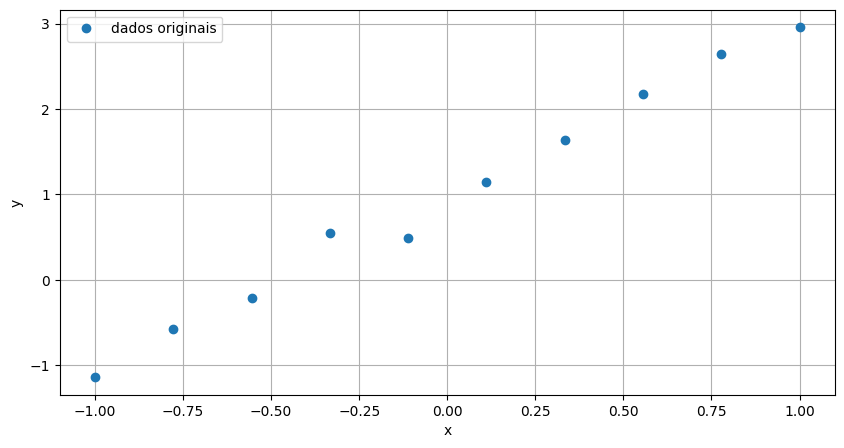

In [4]:
# plot dos dados
plt.figure(figsize=(10,5))
plt.plot(x,y,'o', label='dados originais')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [5]:
# tranformando em um numpy array
x,y = np.array(x).reshape(-1,1), np.array(y).reshape(-1,1)

In [6]:
# modelo
from sklearn.linear_model import LinearRegression

In [7]:
# treinando o modelo: y = a*x + b, valores reais (a,b) = (2,1)
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [8]:
# coeficientes a, b estimados:
# valores estimados usando o numpy diretamente
# a estimado no numpy = 2.0541
# b estimado no numpy = 0.96798

print('a estimado: ', reg.coef_.ravel()[0]) # ravel unidimensional
print('b estimado: ', reg.intercept_[0])

a estimado:  2.054149646077693
b estimado:  0.9679893957477377


In [9]:
# predição do modelo
y_pred = reg.predict(x)

In [10]:
# score do modelo
score = reg.score(x,y)
print('score:',score)

score: 0.9911602591896479


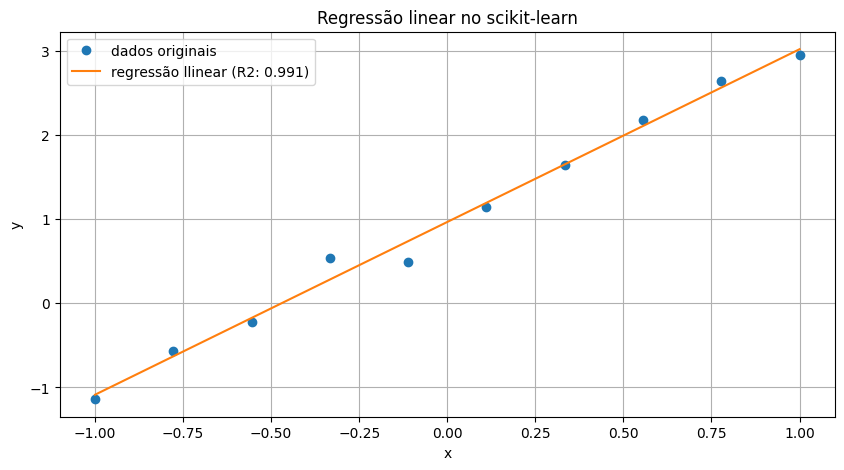

In [11]:
# plot dos dados
plt.figure(figsize=(10,5))
plt.plot(x,y,'o', label='dados originais')
plt.plot(x,y_pred, label='regressão llinear (R2: {:.3f})'.format(score))
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Regressão linear no scikit-learn")
plt.grid()
plt.show()

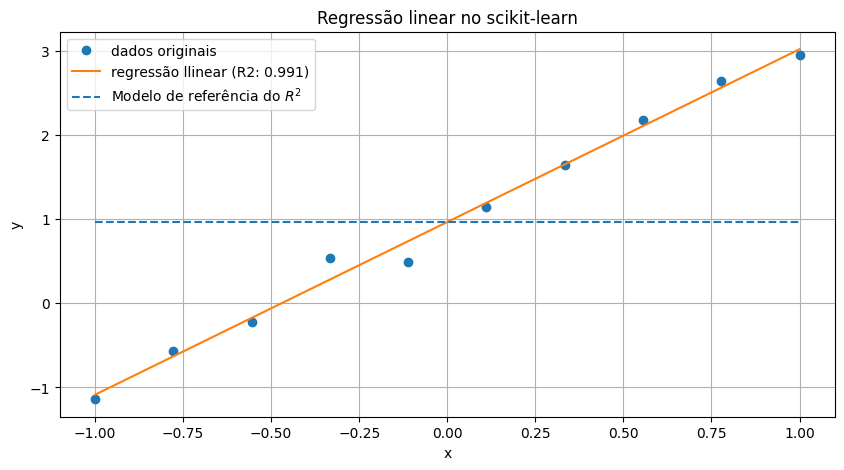

In [12]:
# plot dos dados
plt.figure(figsize=(10,5))
plt.plot(x,y,'o', label='dados originais')
plt.plot(x,y_pred, label='regressão llinear (R2: {:.3f})'.format(score))
plt.hlines(y=y.mean(), xmin=x.min(), xmax=x.max(), linestyle='dashed',label='Modelo de referência do $R^2$')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Regressão linear no scikit-learn")
plt.grid()
plt.show()

In [13]:
# função para cálculo do MSE
def mse(y_true, y_pred, is_ref = False):
    
    # mse modelo
    if is_ref:
        mse = ((y_true - y_true.mean())**2).mean()
    else:
        mse = ((y_true- y_pred)**2).mean()
        
    return mse

In [14]:
# função para cálculo do coeficiente de determinação R2
def r2(mse_reg,mse_ref):
    return 1 - mse_reg/mse_ref

In [16]:
# visualizando y e y_pred
print('y_true:',y.ravel())
print('y_pred:',y_pred.ravel())

y_true: [-1.13956201 -0.57177999 -0.21697033  0.5425699   0.49406657  1.14972239
  1.64228553  2.1749824   2.64773614  2.95684202]
y_pred: [-1.08616025 -0.6296826  -0.17320494  0.28327285  0.73975055  1.19622824
  1.65270588  2.1091825   2.56566135  3.02213904]


In [18]:
# calculando o mse dos modelos
mse_reg = mse(y_true=y,y_pred=y_pred)
print('MSE do modelo de regressão: ',mse_reg)
mse_ref = mse(y_true=y,y_pred=y_pred, is_ref=True)
print('MSE do modelo de referência: ',mse_ref)

MSE do modelo de regressão:  0.015331642031817475
MSE do modelo de referência:  1.734399498892871


In [19]:
# calculando o R2 score
r2_score = r2(mse_reg=mse_reg, mse_ref=mse_ref)

In [21]:
# score retornando pelo sckikit-learn
r2_score_skl = reg.score(x,y)
print('Coeficiente R2 do modelo implementado (scikit-learn):',r2_score_skl)

Coeficiente R2 do modelo implementado (scikit-learn): 0.9911602591896479
